#Question:
How many bikes will you need based on the temperature of a day during the summer season?

###Data Base:

Due to the large amount of information, I decided to work with a smaller model, focusing my efforts on the summer season. I chose temperature as my independent variable and the number of bikes used per day as my dependent variable.

In [37]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# data (as pandas dataframes)
df = seoul_bike_sharing_demand.data.features
df


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


# Data Cleaning

In [82]:
summer_df = df[df['Seasons'] == 'Summer']

result = summer_df.groupby('Date').agg({
    'Rented Bike Count': 'sum',
    'Temperature': 'mean'
}).reset_index()

result = result[result['Rented Bike Count'] > 15000]

result.head()

,Date,Rented Bike Count,Temperature
0,1/6/2018,31928,23.708333
2,1/8/2018,20712,33.429167
3,10/6/2018,29342,21.304167
4,10/7/2018,20641,23.341667
5,10/8/2018,23833,30.579167


# Correlation Analysis

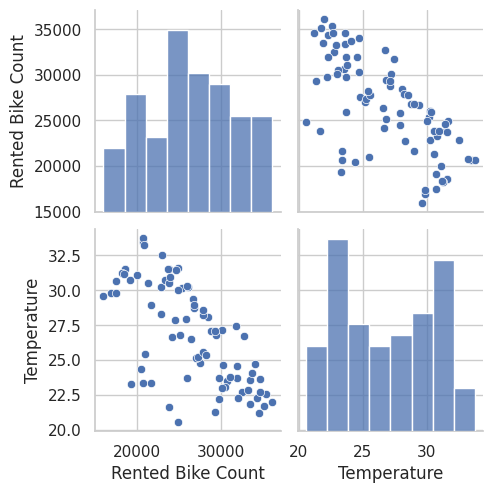

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['Rented Bike Count','Temperature']
sns.pairplot(result[cols], height=2.5)
plt.show()

<Axes: >

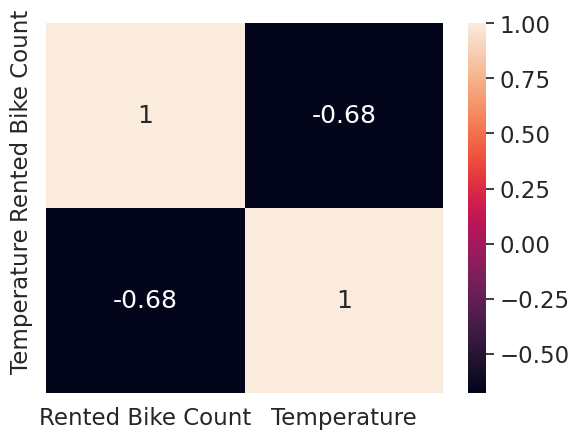

In [69]:
import numpy as np
cm = np.corrcoef(result[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

# Model Creation

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = result['Temperature'].values.reshape(-1, 1)
y = result['Rented Bike Count'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

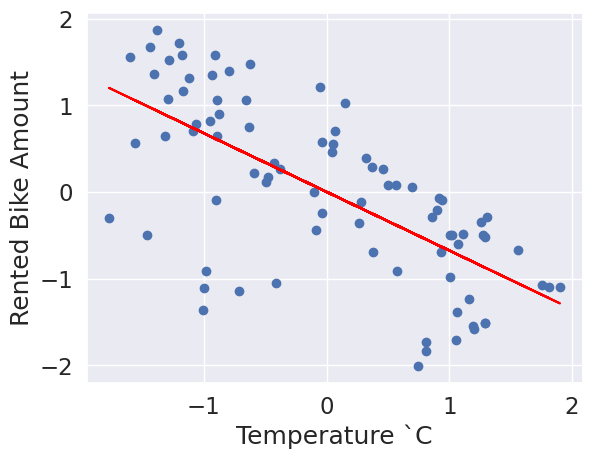

In [71]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='Red')
plt.ylabel("Rented Bike Amount")
plt.xlabel("Temperature `C")
plt.show()

# Prediction

In [78]:
Temp = 28
Temp_std = sc_x.transform(np.array([Temp]).reshape(-1,1))
final= sc_y.inverse_transform(slr.predict(Temp_std))
print("Posible Amount of Bikes Used in a Summer Day ", final)

Posible Amount of Bikes Used in a Summer Day  [[25356.63114243]]


# Result

The relationship between the number of rented bikes and temperature is direct during the summer. On days with lower temperatures, more bikes tend to be rented, whereas higher temperatures generally lead to a decrease in the number of users.